In [61]:
# %%
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [62]:

# Load datasets
google_ads = pd.read_csv('Merge Data/GoogleData.csv')
meta_ads = pd.read_csv('Merge Data/MetaData.csv')
microsoft_ads = pd.read_csv('Merge Data/MicrosoftData.csv')
website_landing = pd.read_csv('Merge Data/WebsiteData.csv')


In [63]:

# Convert 'Date' to datetime
google_ads['Date'] = pd.to_datetime(google_ads['Date'])
meta_ads['Date'] = pd.to_datetime(meta_ads['Date'])
microsoft_ads['Date'] = pd.to_datetime(microsoft_ads['Date'])


In [64]:

# Merge datasets on 'Date'
ads_data = pd.concat([google_ads, meta_ads, microsoft_ads], ignore_index=True)


In [65]:

# Feature Engineering
ads_data['CTR'] = ads_data['Clicks'] / ads_data['Impressions']
ads_data['CPC'] = ads_data['Cost'] / ads_data['Clicks']
ads_data['CPA'] = ads_data['Cost'] / ads_data['Conversions']


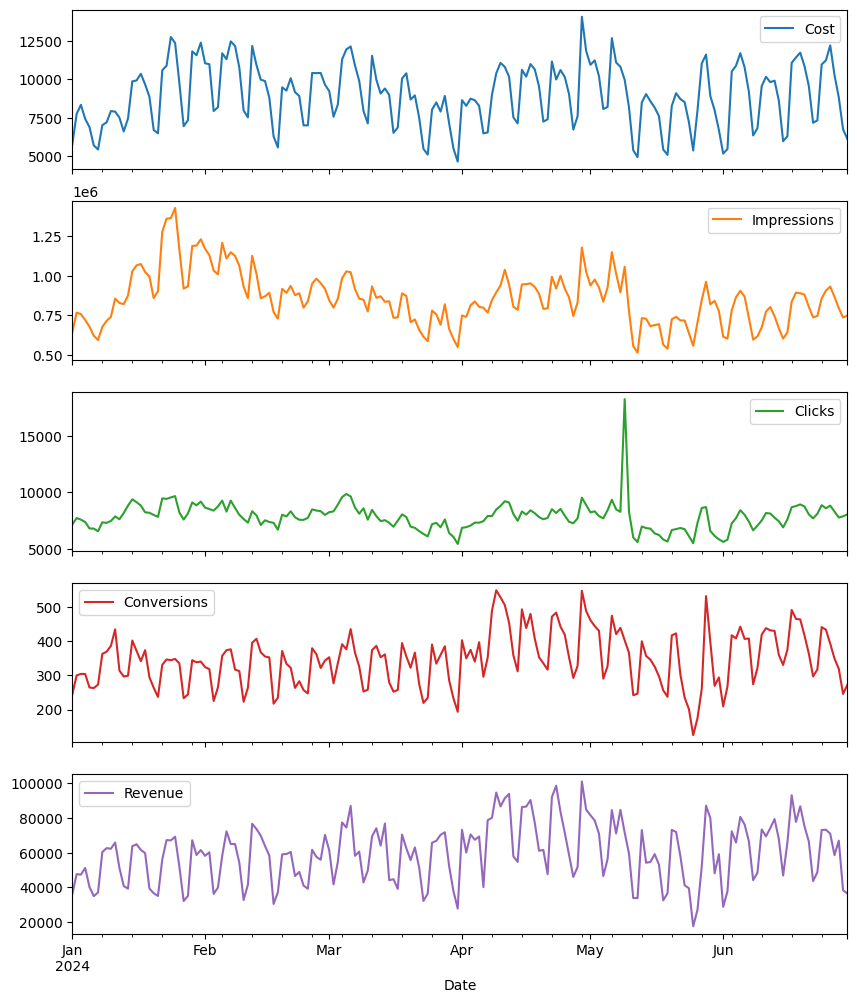

In [66]:

# Exploratory Data Analysis (EDA)
# Visualize trends over time
ads_data.groupby('Date').sum()[['Cost', 'Impressions', 'Clicks', 'Conversions', 'Revenue']].plot(subplots=True, figsize=(10, 12))
plt.show()

In [67]:
# Prepare data for Machine Learning
features = ['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC', 'CPA']
X = ads_data[features]
y = ads_data['Conversions']

# Drop rows with missing values in X
X.dropna(inplace=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the mean of the column
X.fillna(X.mean(), inplace=True)

# Ensure y has the same indices as X
y = y.loc[X.index]

/var/folders/1k/w2_r0tq95bdg2rjqxprgq2zr0000gn/T/ipykernel_18002/2838207001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
/var/folders/1k/w2_r0tq95bdg2rjqxprgq2zr0000gn/T/ipykernel_18002/2838207001.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/1k/w2_r0tq95bdg2rjqxprgq2zr0000gn/T/ipykernel_18002/2838207001.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [68]:
X.count()

Impressions    2546
Clicks         2546
Cost           2546
CTR            2546
CPC            2546
CPA            2546
dtype: int64

In [69]:
y.count()

2546

In [70]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Optionally, evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = model.score(X_test, y_test)
print(f"R^2: {r2}")

Mean Squared Error: 16.23481929607849
R^2: 0.9869853547971401


In [73]:

# Predict conversions for different budget allocations
total_budget = 200000
min_budget_per_channel = total_budget * 0.1


In [74]:

# Example allocation (this should be optimized based on model predictions)
budget_allocation = {
    'Google': min_budget_per_channel,
    'Meta': min_budget_per_channel,
    'Microsoft': min_budget_per_channel,
    'Remaining': total_budget - 3 * min_budget_per_channel
}


In [75]:

# Predict conversions for the next 30 days
future_dates = pd.date_range(start=ads_data['Date'].max(), periods=30)
predictions = []

for date in future_dates:
    for channel, budget in budget_allocation.items():
        # Create a feature set for prediction
        feature_set = {
            'Impressions': budget * 100,  # Example conversion rate
            'Clicks': budget * 10,        # Example conversion rate
            'Cost': budget,
            'CTR': 0.1,                   # Example CTR
            'CPC': 1,                     # Example CPC
            'CPA': 10                     # Example CPA
        }
        feature_df = pd.DataFrame([feature_set])
        predicted_conversions = model.predict(feature_df)[0]
        predictions.append({
            'Date': date,
            'Channel': channel,
            'Budget': budget,
            'Predicted Conversions': predicted_conversions
        })


In [76]:

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)


In [77]:

# Output cumulated budgets and estimated conversions
cumulated_results = predictions_df.groupby('Channel').agg({
    'Budget': 'sum',
    'Predicted Conversions': 'sum'
}).reset_index()


In [78]:

print(cumulated_results)

     Channel     Budget  Predicted Conversions
0     Google   600000.0                5901.51
1       Meta   600000.0                5901.51
2  Microsoft   600000.0                5901.51
3  Remaining  4200000.0                5901.51
